## Classwork project:

What happens to the driven-dissipative quantum harmonic oscillator in the presence of some Kerr non-linearity?
The Kerr non-linearity represents one of the most basics interaction terms, deriving from an effective repulsion (or attraction, dependetly from the sign) between photons. 
In the simple framework of a single photonic mode the description simplifies to a non-linear oscillator, where the non-linearity is a quartic term in the creation/annihilation operators.
The Kerr-oscillator Hamiltonian is then given by
$$
\hat{H} = \omega \hat{a}^\dagger \hat{a} + U \hat{a}^{\dagger 2} \hat{a}^2
$$

We can now repeat some of the above analysis in presence of a finite non-linearity $U\neq 0$.
The dynamics will be in general more complivcated with more prominent quantum effect, let's understand it!

Some questions to explore:
1) In the harmonic oscillator the coherent state is a 'special state' whose time evolution preserves the shape of the quantum wavepacket and the uncertanty remains minimized. In this sense it's the most classical state. Is it still true for the Kerr oscillator? (try to re-do the Schrodinger time evolution for a coherent initial state and make a movie of it)

2) Driven-dissipative Kerr oscillator! Nothing really special happens when we drive the harmonic oscillator, but what about the Kerr? Compute the power spectrum in the steady-state and the g2-correlation function, is there any trace of 'quantumness' there? Show them in a plot, respectively as a function of the driving frequency and as a function of the correlation time delay.

(You can google or chatgpting what is the power spectrum in quantum optics and how is implemented in QuTip; you will discover that is also related to correlation functions and in particular to the $g^{(1)}$, that also gives information on the so-called phase coherence).
(Notice that the concept of "quantumness" is given by comparing the system's behaviour to its eventual classical counterpart. Regarding $g^{(x)}$-correlations there are some simple theorems that says what a classical system can or cannot be. When such bound are violated you can say that you are witnessing a quantum feature!)


In [85]:
# Write your code here...




In [9]:
# Solution:

import numpy as np
import matplotlib.pyplot as plt
from qutip import *

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [46]:
# System parameters
N = 30  # Number of Fock states
omc = 1.  # main frequency
gamma = 0.1  # Dissipation rate
F = 0.04  # Drive strength
omF = 1. #Drive frequency
U_kerr = 0.05 #Non-linearity
# Operators
a = destroy(N)

H = omc * a.dag() * a + U_kerr*a.dag()*a.dag()*a*a

In [51]:
alpha = 2 # Coherence of the initial state
# We start from a coherent state the most classic-like state
psi0 = coherent(N, alpha)
# List of the times for the time evolution
tlist = np.linspace(0, 2 * 2*np.pi/omc, 200)
sol = sesolve(H, psi0, tlist)


x = (a+a.dag())/(2.**.5)
E, T = x.eigenstates()
U = np.zeros((N, N)).astype(np.complex128)
for i in range(N):
    U[:,i] = T[i].full().flatten()
U = Qobj(U)
xlist = ( U.dag() * x * U ).diag()
dx = xlist[1] - xlist[0]


fig, ax = plt.subplots(dpi=120, figsize=(7, 3))
psi0_x = U.dag() * sol.states[0]
line, = ax.plot(xlist, 700 * np.abs(psi0_x.full())**2, lw=2)
V = omc * xlist**2. + U_kerr*xlist**4.
ax.plot(xlist, V, color="black", ls="--")
ax.set_xlabel(r"$x$")
ax.set_xlim(xlist[0], xlist[-1])
ax.set_ylim(0, 420)
#plt.show
plt.close(fig) # Otherwise the static figure also appears

def update(frame):
    psi_t = U.dag() * sol.states[frame]
    line.set_ydata( 700 * np.abs(psi_t.full())**2 )
    return line,

fps = 25
ani = FuncAnimation(fig, update, frames=len(tlist), blit=True, interval=1000 / fps)

#HTML(ani.to_html5_video())
HTML(ani.to_jshtml())

In [19]:
Hdriven = H - omF * a.dag() * a + F*(a+a.dag()) # Driven Hamiltonian of the Kerr oscillator in the rotating frame
c_ops = [np.sqrt(gamma)*a] #given jump operators (in this case only 'a')
rho_ss = steadystate(Hdriven, c_ops) #Steady state of the master equation for a given H 

taus = np.linspace(0., 40., 200)
G2 = correlation_3op_1t(Hdriven, rho_ss, taus, c_ops, a.dag(), a.dag()*a, a)
avgNph = expect(a.dag()*a, rho_ss)
g2 = G2/(avgNph**2.)

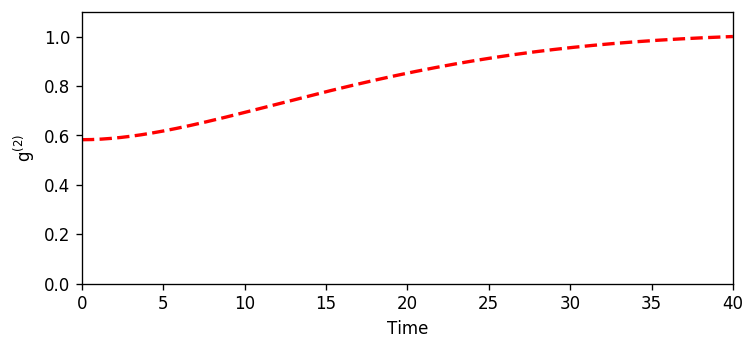

In [13]:
# plot the spectrum
fig, ax = plt.subplots(dpi=120, figsize=(7, 3))
ax.plot(taus, np.abs(g2), 'r--', lw=2)
ax.set_xlabel('Time')
ax.set_ylabel('g$^{(2)}$')
plt.axis( [0, 40, 0, 1.1] )
plt.show()

Total run time:   0.20s


(0.0, 125.66370614359172)

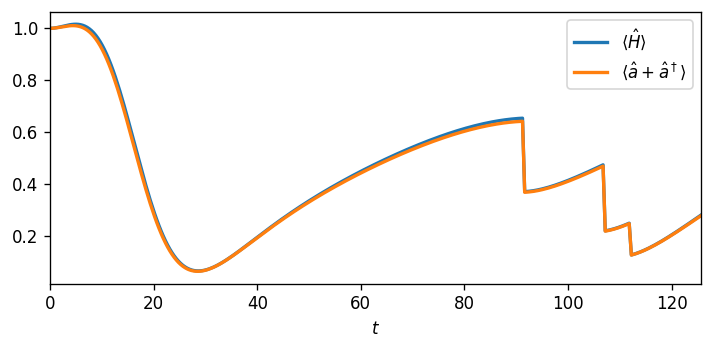

In [14]:
psi0 = fock(N, 1)

c_ops = [np.sqrt(gamma) * a]
e_ops = [H, a.dag()*a ]

tlist = np.linspace(0, 20 * 2*np.pi, 300)

# We perform only one quantum trajectory
sol = mcsolve(Hdriven, psi0, tlist, c_ops, e_ops, ntraj=1)

fig, ax = plt.subplots(dpi=120, figsize=(7, 3))

ax.plot(tlist, sol.expect[0], label=r"$\langle \hat{H} \rangle$", lw=2)
ax.plot(tlist, sol.expect[1], label=r"$\langle \hat{a} + \hat{a}^\dagger \rangle$", lw=2)
ax.legend()
ax.set_xlabel(r"$t$")
ax.set_xlim(tlist[0], tlist[-1])
#ax.set_ylim(None, 6)